In [1]:
!pip install --upgrade quantecon

import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ

# == Model parameters == #
a0 = 5
a1 = 0.5
σ = 0.15
ρ = 0.9
γ = 100
β = 0.95
c = 0
T = 10

# == Useful constants == #
m0 = (a0-c)/(2 * a1)
m1 = 1/(2 * a1)

# == Formulate LQ problem == #

#T is the number of periods in a finite horizon problem.
#R is the payoff (or cost) matrix that corresponds with the state variable x and is n x n.
#Rf is the final (in a finite horizon model) payoff(or cost) matrix that corresponds with the control variable u and is nxn
#Q is the payoff (or cost) matrix that corresponds with the control variable u and is k x k.

Q = γ

R = [[a1, -a1, 0],
     [-a1, a1, 0],
     [0,   0,  0]]

A = [[ρ, 0, m0 * (1 - ρ)],
     [0, 1, 0],
     [0, 0, 1]]

B = [[0],
     [1],
     [0]]
C = [[m1*σ],
     [0],
     [0]]

lq_10 = LQ(Q, R, A, B, C=C, beta=β)

# == Simulate state / control paths == #
x0 = (m0, 2, 1)
xp, up, wp = lq_10.compute_sequence(x0, T)
q_bar = xp[0, :]
q = xp[1, :]

# == Plot simulation results == #
fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_xlabel('Time')

# == Some fancy plotting stuff -- simplify if you prefer == #
bbox = (0., 1.01, 1., .101)
legend_args = {'bbox_to_anchor' : bbox, 'loc' : 3, 'mode' : 'expand'}
p_args = {'lw' : 2, 'alpha' : 0.6}

time = range(len(q))
ax.set_xlim(0, max(time))
ax.plot(time, q_bar, 'k-', lw=2, alpha=0.6, label=r'$\bar q_t$')
ax.plot(time, q, 'b-', lw=2, alpha=0.6, label=r'$q_t$')
ax.legend(ncol=2, **legend_args)
s = r'dynamics with $\gamma = {}$'.format(γ)
ax.text(max(time) * 0.6, 1 * q_bar.max(), s, fontsize=14)
plt.show()

print(lq_10.P,'\n',lq_10.d,'\n',lq_10.F)

Requirement already up-to-date: quantecon in c:\users\jj reddy\anaconda3\lib\site-packages (0.4.6)


<Figure size 1000x650 with 1 Axes>

[[  1.95008376  -2.69327622   3.71596228]
 [ -2.69327622   5.25409373 -12.80408757]
 [  3.71596228 -12.80408757  45.44062642]] 
 0.8336608068850129 
 [[-0.02193276  0.04754094 -0.12804088]]


In [2]:
#V(x) = x'Px + d
#F is the policy rule that determines the choice of control in each period. Returns [x_path, u_path, w_path]

P_10,d_10,F_10 = lq_10.P,lq_10.d,lq_10.F
print(F_10)

[[-0.02193276  0.04754094 -0.12804088]]


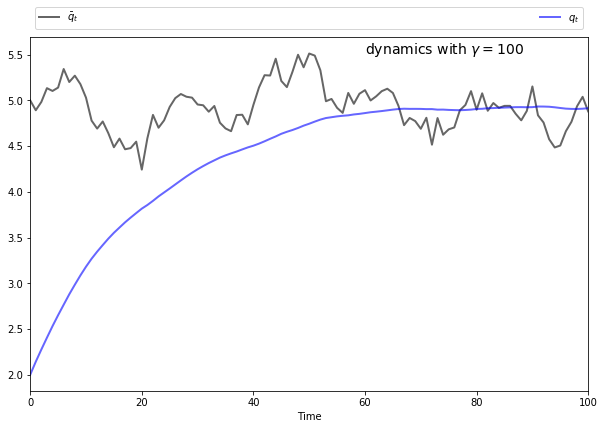

[[  1.95008376  -2.69327622   3.71596228]
 [ -2.69327622   5.25409373 -12.80408757]
 [  3.71596228 -12.80408757  45.44062642]] 
 0.8336608068850129 
 [[-0.02193276  0.04754094 -0.12804088]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ

# == Model parameters == #
a0 = 5
a1 = 0.5
σ = 0.15
ρ = 0.9
γ = 100
β = 0.95
c = 0
T = 100

# == Useful constants == #
m0 = (a0-c)/(2 * a1)
m1 = 1/(2 * a1)

# == Formulate LQ problem == #
Q = γ
R = [[a1, -a1, 0],
     [-a1, a1, 0],
     [0,   0,  0]]
A = [[ρ, 0, m0 * (1 - ρ)],
     [0, 1, 0],
     [0, 0, 1]]

B = [[0],
     [1],
     [0]]
C = [[m1*σ],
     [0],
     [0]]

lq_100 = LQ(Q, R, A, B, C=C, beta=β)

# == Simulate state / control paths == #
x0 = (m0, 2, 1)
xp, up, wp = lq_100.compute_sequence(x0, T)
q_bar = xp[0, :]
q = xp[1, :]

# == Plot simulation results == #
fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_xlabel('Time')

# == Some fancy plotting stuff -- simplify if you prefer == #
bbox = (0., 1.01, 1., .101)
legend_args = {'bbox_to_anchor' : bbox, 'loc' : 3, 'mode' : 'expand'}
p_args = {'lw' : 2, 'alpha' : 0.6}

time = range(len(q))
ax.set_xlim(0, max(time))
ax.plot(time, q_bar, 'k-', lw=2, alpha=0.6, label=r'$\bar q_t$')
ax.plot(time, q, 'b-', lw=2, alpha=0.6, label=r'$q_t$')
ax.legend(ncol=2, **legend_args)
s = r'dynamics with $\gamma = {}$'.format(γ)
ax.text(max(time) * 0.6, 1 * q_bar.max(), s, fontsize=14)
plt.show()

print(lq_100.P,'\n',lq_100.d,'\n',lq_100.F)

In [4]:
#V(x) = x'Px + d
#F is the policy rule that determines the choice of control in each period. Returns [x_path, u_path, w_path]

P_100,d_100,F_100 = lq_100.P,lq_100.d,lq_100.F
print(F_100)

[[-0.02193276  0.04754094 -0.12804088]]


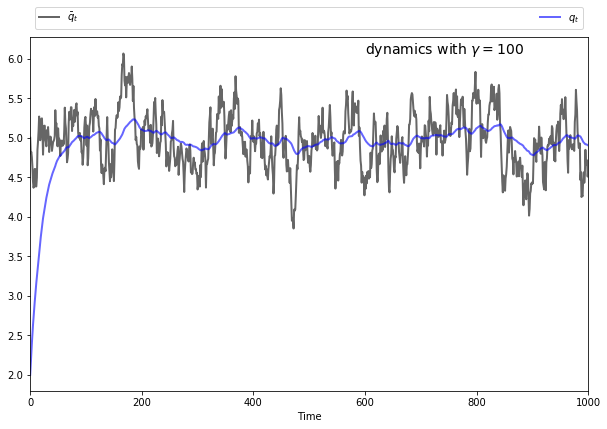

[[  1.95008376  -2.69327622   3.71596228]
 [ -2.69327622   5.25409373 -12.80408757]
 [  3.71596228 -12.80408757  45.44062642]] 
 0.8336608068850129 
 [[-0.02193276  0.04754094 -0.12804088]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ

# == Model parameters == #
a0 = 5
a1 = 0.5
σ = 0.15
ρ = 0.9
γ = 100
β = 0.95
c = 0
T = 1000

# == Useful constants == #
m0 = (a0-c)/(2 * a1)
m1 = 1/(2 * a1)

# == Formulate LQ problem == #
Q = γ
R = [[a1, -a1, 0],
     [-a1, a1, 0],
     [0,   0,  0]]
A = [[ρ, 0, m0 * (1 - ρ)],
     [0, 1, 0],
     [0, 0, 1]]

B = [[0],
     [1],
     [0]]
C = [[m1*σ],
     [0],
     [0]]

lq_1000 = LQ(Q, R, A, B, C=C, beta=β)

# == Simulate state / control paths == #
x0 = (m0, 2, 1)
xp, up, wp = lq_1000.compute_sequence(x0, T)
q_bar = xp[0, :]
q = xp[1, :]

# == Plot simulation results == #
fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_xlabel('Time')

# == Some fancy plotting stuff -- simplify if you prefer == #
bbox = (0., 1.01, 1., .101)
legend_args = {'bbox_to_anchor' : bbox, 'loc' : 3, 'mode' : 'expand'}
p_args = {'lw' : 2, 'alpha' : 0.6}

time = range(len(q))
ax.set_xlim(0, max(time))
ax.plot(time, q_bar, 'k-', lw=2, alpha=0.6, label=r'$\bar q_t$')
ax.plot(time, q, 'b-', lw=2, alpha=0.6, label=r'$q_t$')
ax.legend(ncol=2, **legend_args)
s = r'dynamics with $\gamma = {}$'.format(γ)
ax.text(max(time) * 0.6, 1 * q_bar.max(), s, fontsize=14)
plt.show()


print(lq_1000.P,'\n',lq_1000.d,'\n',lq_1000.F)

In [6]:
#V(x) = x'Px + d
#F is the policy rule that determines the choice of control in each period. Returns [x_path, u_path, w_path]

P_1000,d_1000,F_1000 = lq_1000.P,lq_1000.d,lq_1000.F
print(F_1000)

[[-0.02193276  0.04754094 -0.12804088]]


In [7]:
#comparing the policies with various time period

import pandas as pd
policy_data = pd.DataFrame(np.column_stack((F_10.T,F_100.T,F_1000.T)),columns = ['T=10','T=100','T=1000'])
policy_data.rename(index={0:'x_path', 1: 'u_path', 2:'w_path'},inplace=True)
policy_data

,T=10,T=100,T=1000
x_path,-0.021933,-0.021933,-0.021933
u_path,0.047541,0.047541,0.047541
w_path,-0.128041,-0.128041,-0.128041
